### 3. Model Training

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

#### Load dataset

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

#### Fliter Train/ Val Set to only include 2015-2019 (pre-COVID)
- Train: 2015 Jan- 2019 Sep 
- Val: 2019 Oct- Dec

In [3]:
df_X_train = X.drop(X.index[list(range(1734, 1946))])
df_y_train = y['sales'][0:1734]

In [4]:
df_X_train.shape, df_y_train.shape

((1734, 20), (1734,))

In [5]:
df_X_val = X.loc[1734:1824]
df_y_val = y['sales'][1734:1825]
df_X_val = df_X_val.reset_index(drop=True)
df_y_val = df_y_val.reset_index(drop=True)

In [6]:
df_X_val.shape, df_y_val.shape

((91, 20), (91,))

#### Set up data for COVID period (2020 Jan- April) to study potential drift 

In [7]:
df_X_covid = X.loc[1825:]
df_y_covid = y['sales'][1825:]
df_X_covid = df_X_covid.reset_index(drop=True)
df_y_covid = df_y_covid.reset_index(drop=True)

In [8]:
df_X_covid.shape, df_y_covid.shape

((121, 20), (121,))

#### Random Forest Model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_X_train, df_y_train, test_size=0.15, random_state=0)

In [10]:
# Random Forest
rf = RandomForestRegressor()
# fit RF to training set
rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8993337234005354

#### Prediction for Val data: 2019 Oct-Dec

In [12]:
y_pred_val = rf.predict(df_X_val)

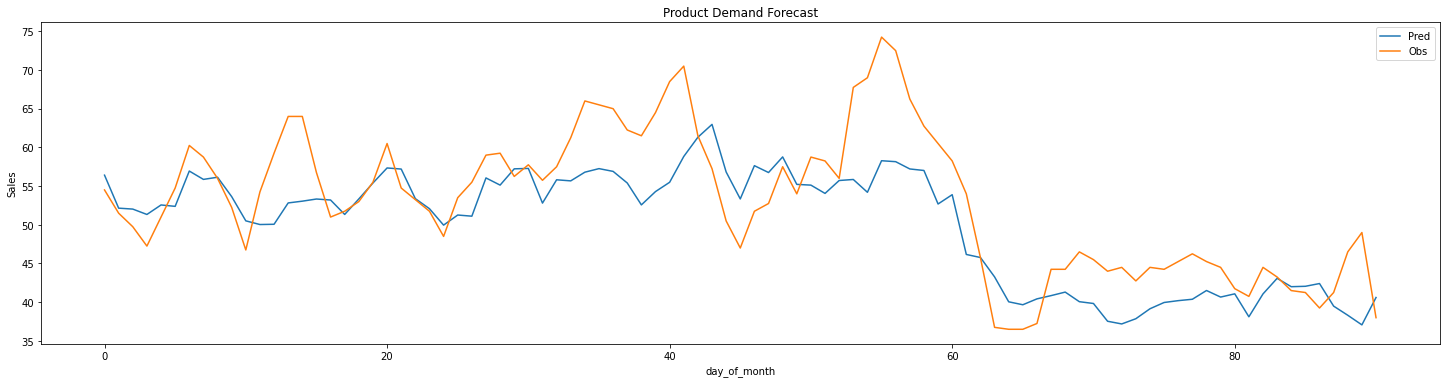

In [13]:
fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
#ax.xaxis.set_major_locator(locator)
plt.plot(y_pred_val, label='Pred')
plt.plot(df_y_val, label='Obs')
plt.tight_layout()
plt.title('Product Demand Forecast')
plt.xlabel('day_of_month')
plt.ylabel("Sales")
plt.legend()
plt.show()

#### Model prediction for COVID data: 2020 Jan-April

In [14]:
y_pred_covid = rf.predict(df_X_covid)

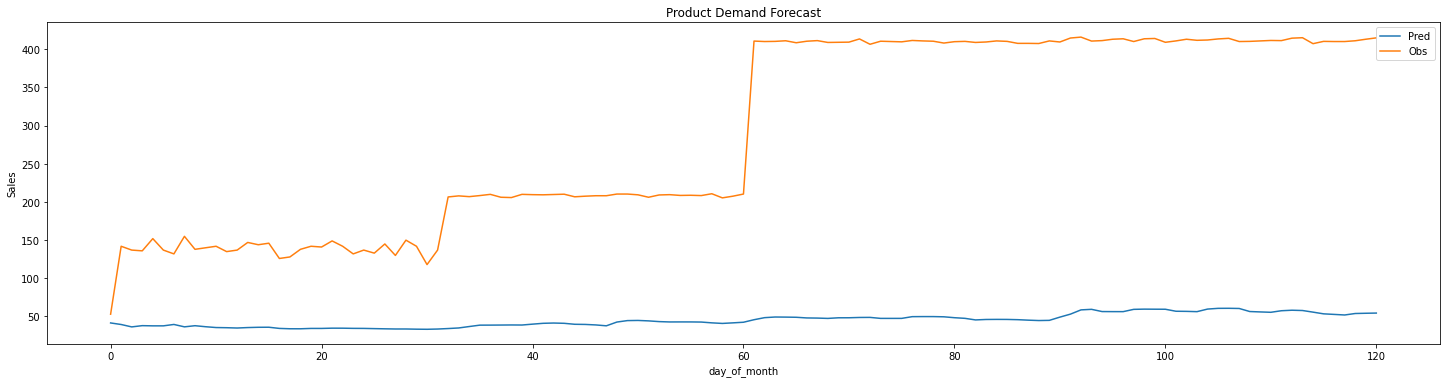

In [15]:
fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
#ax.xaxis.set_major_locator(locator)
plt.plot(y_pred_covid, label='Pred')
plt.plot(df_y_covid, label='Obs')
plt.tight_layout()
plt.title('Product Demand Forecast')
plt.xlabel('day_of_month')
plt.ylabel("Sales")
plt.legend()
plt.show()

#### Save Random Forest model binary

In [16]:
import joblib
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']